# Question from Class 15

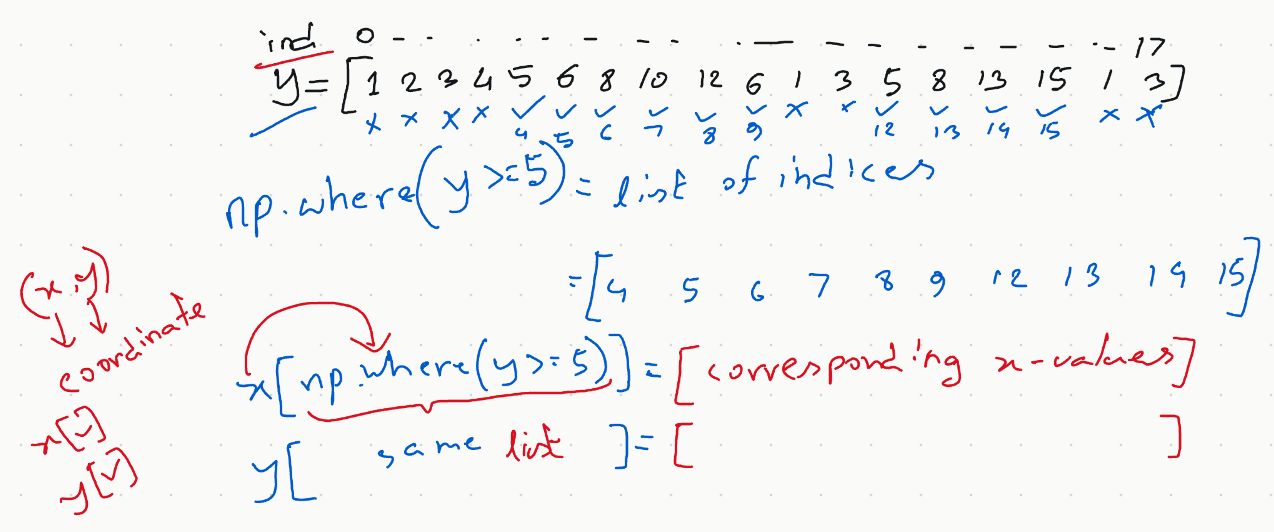

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
points = 3171
print(f'Number of points above the curve: {points}')

Number of points above the curve: 3171


# Optimization

**Problem statement**

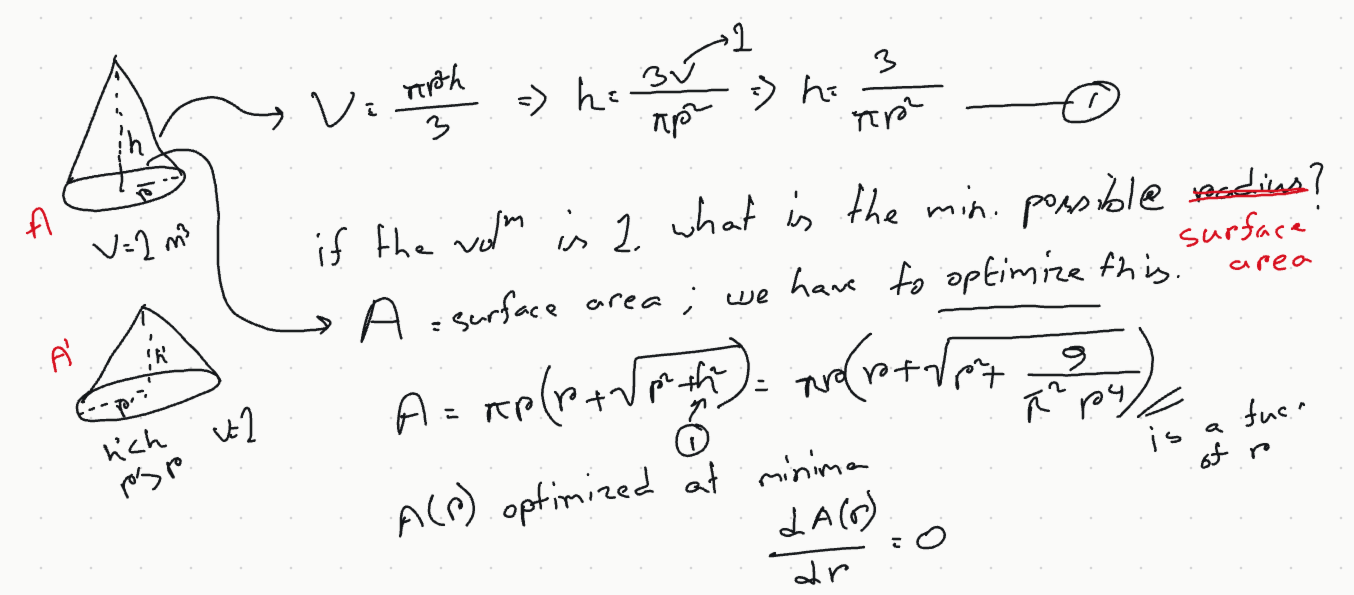

In [5]:
import matplotlib.pyplot as plt
import numpy as np


import sympy as sp
sympy.init_printing()


# new here
from scipy import optimize

In [6]:
r, h = sp.symbols("r, h")
A_surf = sp.pi * r * (r + sp.sqrt(r**2 + h**2))
A_surf

    ⎛       _________⎞
    ⎜      ╱  2    2 ⎟
π⋅r⋅⎝r + ╲╱  h  + r  ⎠

In [7]:
V_cone = sympy.Rational(1,3)* sympy.pi * r**2 * h
V_cone

     2
π⋅h⋅r 
──────
  3   

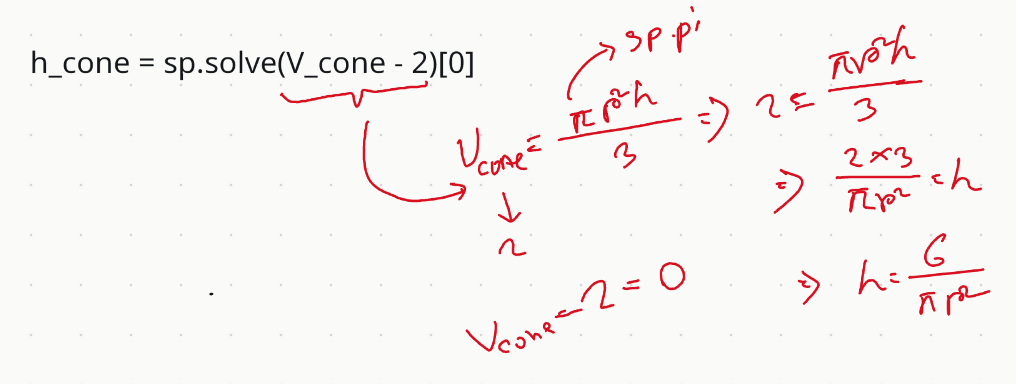

In [14]:
h_cone = sp.solve(V_cone - 1)[0]
h_cone

⎧    3  ⎫
⎪h: ────⎪
⎨      2⎬
⎪   π⋅r ⎪
⎩       ⎭

extra; not part of the problem

In [10]:
#h_cone = sp.solve(V_cone - sp.pi)[0]
#h_cone

⎧   3 ⎫
⎪h: ──⎪
⎨    2⎬
⎪   r ⎪
⎩     ⎭

In [15]:
# area_of_r means A(r)
Area_of_r = A_surf.subs(h_cone) # substitutes the solution of h_cone in the expression of area
Area_of_r

    ⎛         ____________⎞
    ⎜        ╱  2     9   ⎟
π⋅r⋅⎜r +    ╱  r  + ───── ⎟
    ⎜      ╱         2  4 ⎟
    ⎝    ╲╱         π ⋅r  ⎠

In [17]:
# finds the minima of A(r)
r_min = sp.solve(Area_of_r.diff(r))[0]
r_min

   3 ___
√2⋅╲╱ 3 
────────
  3 ___ 
2⋅╲╱ π  

In [18]:
# print the value
_.evalf()

0.696319882684666

In [19]:
# checking the second differential; if positive then minima

Area_of_r.diff(r, 2).subs(r, r_min)

32⋅π
────
 3  

In [20]:
Area_of_r.subs(r, r_min) # minimum possible area for volume to be 1 (ans. to our question)

              ⎛   3 ___    2/3     5/6⎞
   3 ___  2/3 ⎜√2⋅╲╱ 3    2   ⋅√3⋅6   ⎟
√2⋅╲╱ 3 ⋅π   ⋅⎜──────── + ────────────⎟
              ⎜  3 ___        3 ___   ⎟
              ⎝2⋅╲╱ π       4⋅╲╱ π    ⎠
───────────────────────────────────────
                   2                   

In [21]:
_.evalf()

6.09294778537956

# now we will use scipy.optimize

**brent method**

In [26]:
def A(r):
    return np.pi * r * (r + np.sqrt(r**2 + 9 / (np.pi**2 * r**4)))

r_min_brent = optimize.brent(A, brack=(4, 5), tol=1.48e-08, full_output=0, maxiter=500)
r_min_brent

0.6963198844300634

In [27]:
# minimum possible area for volume to be 1 (ans. to our question)
A(r_min_brent)

6.092947785379556

**minimum scalar**

In [28]:
optimize.minimize_scalar(A, bracket=(4, 5)) #bracket means interval

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 6.092947785379556
       x: 0.6963198844300634
     nit: 12
    nfev: 16

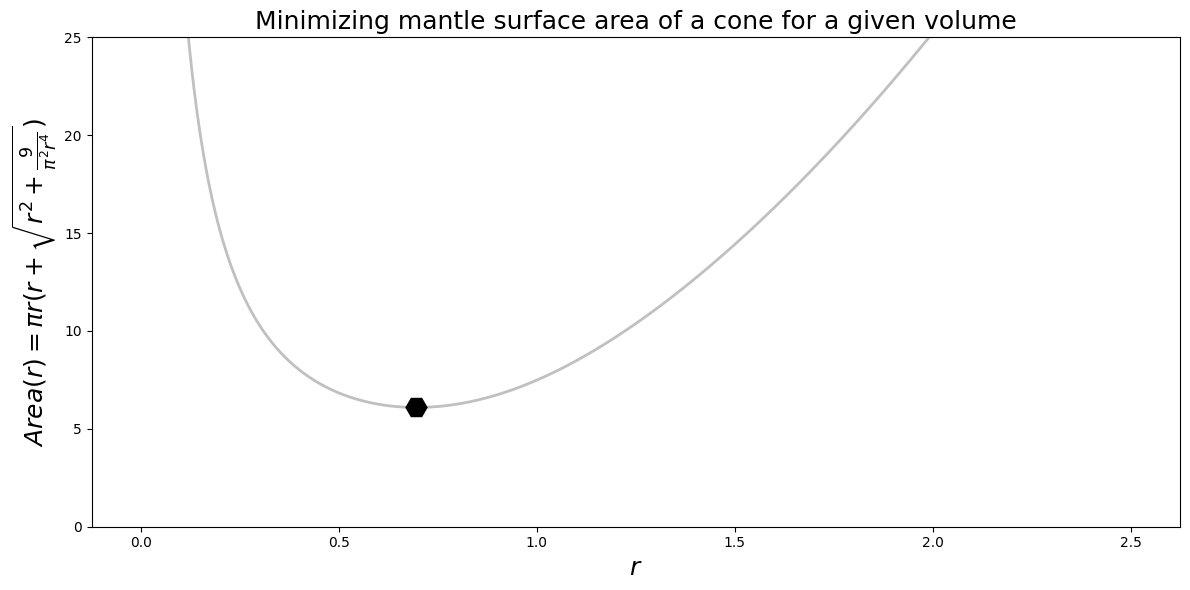

In [32]:
# creates an array of values for r
r = np.linspace(0.001, 2.5, 450)



fig = plt.figure(figsize=(12, 6))

plt.plot(r, A(r), lw=2, color='silver') # solid func line
plt.plot(r_min, A(r_min_brent), 'kH', markersize=15) # shows the minima
plt.title("Minimizing mantle surface area of a cone for a given volume", fontsize=18)
plt.xlabel(r"$r$", fontsize=18)
plt.ylabel(r"$Area(r) = \pi r (r + \sqrt{r^2 + \frac{9}{\pi^2 r^4}}) $", fontsize=18)
#ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
plt.ylim(0, 25)

fig.tight_layout()
fig.savefig('chapter3_Optimization.jpg')

# Linear optimization

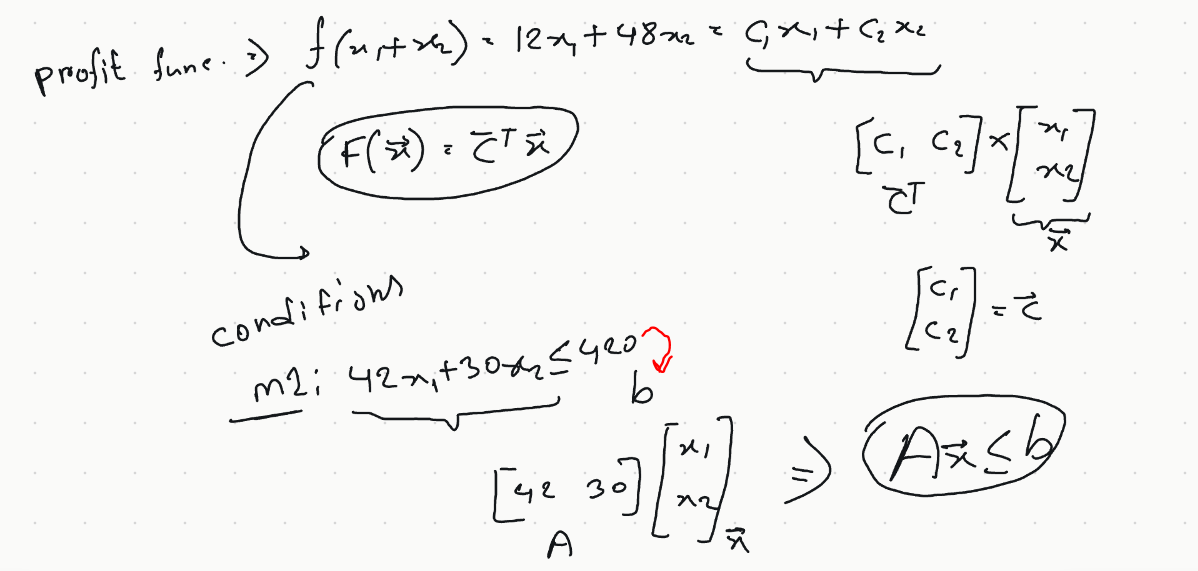

# linprog (Linear Programming from scipy.optimize)

In [33]:
import numpy as np
from scipy.optimize import linprog



c = np.array([[12, 48]])
c_max = c*-1
# linprog is designed for minimizing func but we need maximizing
# so we take the negative of c in c_max

A = np.array([[42,30],[16,40],[0,60]])
b = np.array([[420,420,420]])


# means x1, x2 can't be negative
x1 = (0,None)
x2 = (0,None)

maxIter = 100


res = linprog(c_max, A_ub=A, b_ub=b, method = 'revised simplex', bounds=[x1,x2])

res

<ipython-input-33-bb4630d2ac01>:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c_max, A_ub=A, b_ub=b, method = 'revised simplex', bounds=[x1,x2])


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -396.0
       x: [ 5.000e+00  7.000e+00]
     nit: 2

In [34]:
print(f'Optimum: {res.fun*-1} at (x | y) = ( {res.x[0]} | {res.x[1]} )')

Optimum: 396.0 at (x | y) = ( 5.0 | 7.0 )


In [35]:
print(f'Optimum: {c.dot(res.x)[0]} at (x | y) = ( {res.x[0]} | {res.x[1]} )' )

Optimum: 396.0 at (x | y) = ( 5.0 | 7.0 )
